#Clasificación de imágenes (Perro o Gato) usando la cámara 🐙
---


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

#Descargar el set de datos
datos, metadatos = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

**Manipular y visualizar el set lo pasamos a:**
**TAMANO_IMG (100x100)**
**y a blanco y negro (solo para visualizar)**

In [ ]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize=(20,20))

TAMANO_IMG=100

for i, (imagen, etiqueta) in enumerate(datos['train'].take(16)):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap='gray')

**Variable que contendra todos los pares de los datos (imagen y etiqueta) ya modificados (blanco y negro, 100x100)
Y luego cambiar cada imagen a un mismo tamaño**

In [3]:
datos_entrenamiento = []

In [4]:
for i, (imagen, etiqueta) in enumerate(datos['train']): #Todos los datos
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) #Cambiar tamano a 100,100,1
  datos_entrenamiento.append([imagen, etiqueta])

In [ ]:
#Ver los datos del primer indice
datos_entrenamiento[0]

In [6]:
#Ver cuantos datos tengo en la variable
len(datos_entrenamiento)

23262

**Preparar mis variables X (entradas) y y (etiquetas) separadas:**

- X = [] Imagenes de entrada (pixeles)
- Y = [] etiquetas (perro, gato)

In [7]:
X = []
Y = []

for imagen, etiqueta in datos_entrenamiento:
 X.append(imagen)
 Y.append(etiqueta)

**Normalizar los datos de las X (imagenes). Se pasan a numero flotante y dividen entre 255 para quedar de 0-1 en lugar de 0-255**

In [8]:
import numpy as np
X = np.array(X).astype(float) / 255

**Convertir etiquetas en arreglo simple**

1.   Elemento de lista
2.   Elemento de lista



In [9]:
Y = np.array(Y)
Y

array([1, 1, 1, ..., 0, 1, 0])

**Mostramos el total de imagenes y el tamaño**

In [10]:
X.shape

(23262, 100, 100, 1)

In [11]:
# Llamar al recolector de basura
import gc
gc.collect()

0

#Crear los modelos iniciales
---

- **Usan sigmoid como salida, Sigmoid regresa siempre datos entre 0 y 1.**
- **Realizamos el entrenamiento para al final considerar que si la respuesta se
acerca a 0, es un gato, y si se acerca a 1, es un perro.**

- **Este modelo CNN toma imágenes de entrada de tamaño 100x100 píxeles con 1 canal (escala de grises)**
- **pasa por varias capas convolucionales y de max-pooling para extraer características.**
- **aplica regularización con Dropout, aplana la salida y finalmente pasa por capas densas para realizar la clasificación binaria usando una función de activación sigmoid.**

In [12]:
modeloCNN2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
# Llamar al recolector de basura
import gc
gc.collect()

467

**Compilar modelos. Usar crossentropy binario ya que tenemos solo 2 opciones (perro o gato)**

In [14]:
modeloCNN2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import TensorBoard

**La variable de tensorboard se envia en el arreglo de "callbacks" (hay otros tipos de callbacks soportados)**

**En este caso guarda datos en la carpeta indicada en cada epoca, de manera que despues**

**Tensorboard los lee para hacer graficas**

In [ ]:
tensorboardCNN2 = TensorBoard(log_dir='logs/cnn2')
modeloCNN2.fit(X, Y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardCNN2])

**Cargar la extension de tensorboardCNN2 de colab**

In [17]:
%load_ext tensorboard

**Ejecutar tensorboard e indicarle que lea la carpeta "logs"**

In [ ]:
%tensorboard --logdir logs

**ver las imagenes de la variable X sin modificaciones por aumento de datos**

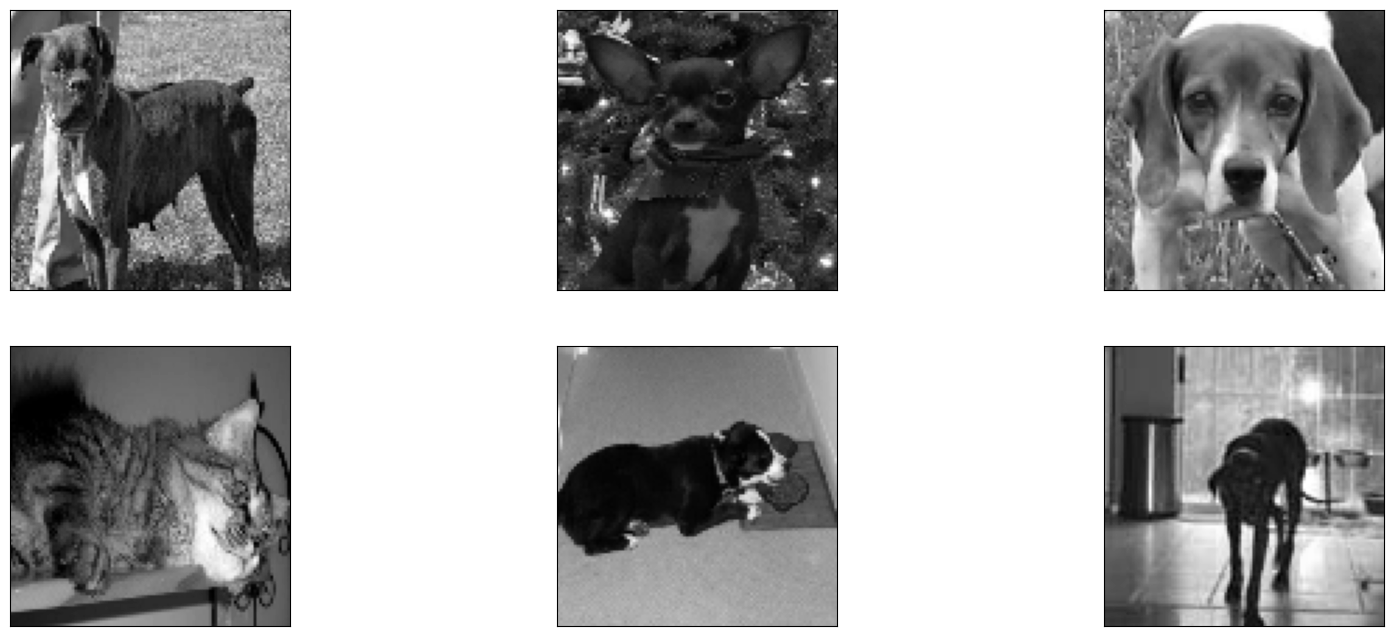

In [19]:
plt.figure(figsize=(20, 8))
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X[i].reshape(100, 100), cmap="gray")

#Preparación de los datos para el entrenamiento
---


**Realizar el aumento de datos con varias transformaciones. Al final, graficar 10 como ejemplo**

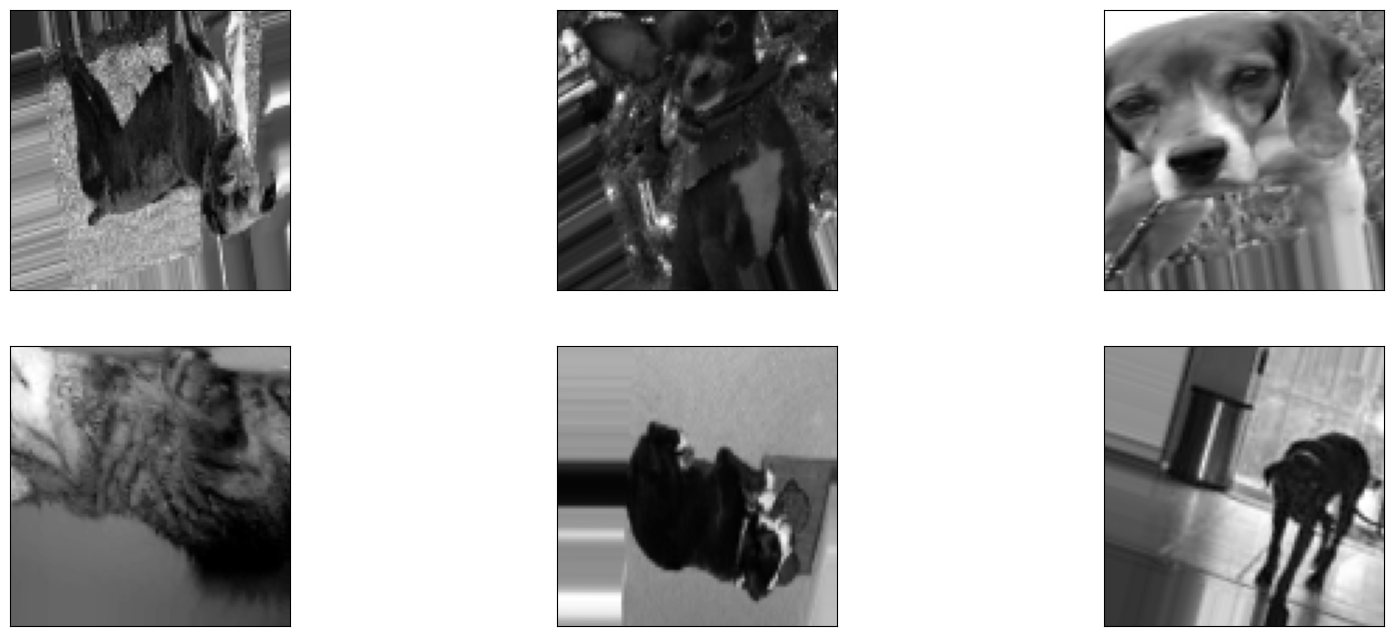

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen, etiqueta in datagen.flow(X, Y, batch_size=10, shuffle=False):
  for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(100, 100), cmap="gray")
  break

In [21]:

modeloCNN2_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
modeloCNN2_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

**Separar los datos de entrenamiento y los datos de pruebas en variables diferentes**

In [23]:
len(X) * .85 #19700
len(X) - 19700 #3562

X_entrenamiento = X[:19700]
X_validacion = X[19700:]

y_entrenamiento = Y[:19700]
y_validacion = Y[19700:]

**Usar la funcion flow del generador para crear un iterador que podamos enviar como entrenamiento a la funcion FIT del modelo**

In [24]:
data_gen_entrenamiento = datagen.flow(X_entrenamiento, y_entrenamiento, batch_size=32)

 **Configurar TensorBoard para monitorear el entrenamiento del modelo y luego entrena el modelo usando el data_gen_entrenamiento, validando con un conjunto de datos específico, durante 150 épocas con un tamaño de lote de 32 (32 muestras a la vez).**

In [ ]:
tensorboardCNN2_AD = TensorBoard(log_dir='logs/cnn2_AD')

modeloCNN2_AD.fit(
    data_gen_entrenamiento,
    epochs=150, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardCNN2_AD]
)

# Resultado después del entrenamiento

---

In [ ]:
%tensorboard --logdir logs

**Guardar el modelo**

In [ ]:
modeloCNN2_AD.save('perros-gatos-cnn-ad.h5')

In [ ]:
!pip install tensorflowjs

In [29]:
!mkdir carpeta_salida

In [ ]:
!tensorflowjs_converter --input_format keras perros-gatos-cnn-ad.h5 carpeta_salida